# **НИР ТМО Харитонов Андрей ИУ5-64Б**

## Описание данных

**PassengerId** ID пассажира<br>
**Survived** Выжил ли пассажир (0 = Нет; 1 = Да)<br>
**Pclass** Социальный статус (1 = бедный; 2 средний; 3 = богатый) <br>
**Name** Имя<br>
**Sex** Пол<br>
**Age** Возраст<br>
**SibSp** Количество родственников/супругов на борту<br>
**Parch** Количество родителей/детей на борту<br>
**Ticket** Номер билета<br>
**Fare** Стоимость проезда<br>
**Cabin** Кабина<br>
**Embarked** Порт посадки (C = Шербур; Q = Квинстаун; S = Стайтгемптон)<br>

In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('titanik.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [3]:
df['Cabin'].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

In [4]:
df.shape

(418, 12)

## Обработка данных

### Пропуски

In [5]:
# checking nulls
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

В датасете пропуски присутствуют в категориях **Age**, **Fare** и **Cabin**. Устраним их

**Заполнение категории Fare**</br>
Ожидается что категория стоимости проезда коррелирует с категорией социального статуса пассажира. Заменим этот пропуск медианой того класса, которому он принадлежит

In [6]:
df[df.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [7]:
fare_mean_c3 = df.Fare[df.Pclass == 3].mean()
df['Fare'].fillna(value=fare_mean_c3, inplace=True)

-----------------------------
**Заполнение категории Age**

Заметим, что категория имени содержит категориальные данные социального положения человека (Miss, Mrs, Mr, Master). Заменим пропуски возрастов средними значениями соответствующих категорий социального положения 

In [8]:
mean_age_miss = df[df["Name"].str.contains('Miss.', na=False)]['Age'].mean().round()
mean_age_mrs = df[df["Name"].str.contains('Mrs.', na=False)]['Age'].mean().round()
mean_age_mr = df[df["Name"].str.contains('Mr.', na=False)]['Age'].mean().round()
mean_age_master = df[df["Name"].str.contains('Master.', na=False)]['Age'].mean().round()

print('Mean age of Miss. {}'.format(mean_age_miss))
print('Mean age of Mrs. {}'.format(mean_age_mrs))
print('Mean age of Mr. {}'.format(mean_age_mr))
print('Mean age of Master. {}'.format(mean_age_master))

def fill_age(name_age):
    
    name = name_age[0]
    age = name_age[1]
    
    if pd.isnull(age):
        if 'Mr.' in name:
            return mean_age_mr
        if 'Mrs.' in name:
            return mean_age_mrs
        if 'Miss.' in name:
            return mean_age_miss
        if 'Master.' in name:
            return mean_age_master
        if 'Dr.' in name:
            return mean_age_master
        if 'Ms.' in name:
            return mean_age_miss
    else:
        return age

df['Age'] = df[['Name', 'Age']].apply(fill_age ,axis=1)

Mean age of Miss. 22.0
Mean age of Mrs. 39.0
Mean age of Mr. 34.0
Mean age of Master. 7.0


-----------------

**Отбрасывание лишних данных**<br/>
Так как категория кабины имеет слишком много пропусков и не важна для дальнейших исследований, просто отбросим её. Также отбросим ID пассажира, его имя и номер билета как малоинформативные данные

In [9]:
df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

## Кодирование категориальных признаков

In [10]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          79
SibSp         7
Parch         8
Fare        170
Embarked      3
dtype: int64

Заметим, что категориальными являются признаки Survived, Pclass, Sex, SibSp, Parch, Embarked. Закодируем их

In [11]:
df_cat = df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']]
df_cat.head()

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,male,0,0,Q,0
1,3,female,1,0,S,1
2,2,male,0,0,Q,0
3,3,male,0,0,S,0
4,3,female,1,1,S,1


In [12]:
categories = {"female": 1, "male": 0}
df['Sex']= df['Sex'].map(categories)

prepared_df = pd.concat([df, pd.get_dummies(df['Embarked'],drop_first=True)], axis=1) 

prepared_df.drop(['Embarked'], axis=1, inplace=True)

In [13]:
prepared_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,0,34.5,0,0,7.8292,1,0
1,1,3,1,47.0,1,0,7.0000,0,1
2,0,2,0,62.0,0,0,9.6875,1,0
3,0,3,0,27.0,0,0,8.6625,0,1
4,1,3,1,22.0,1,1,12.2875,0,1


## Корреляционный анализ данных

<AxesSubplot: >

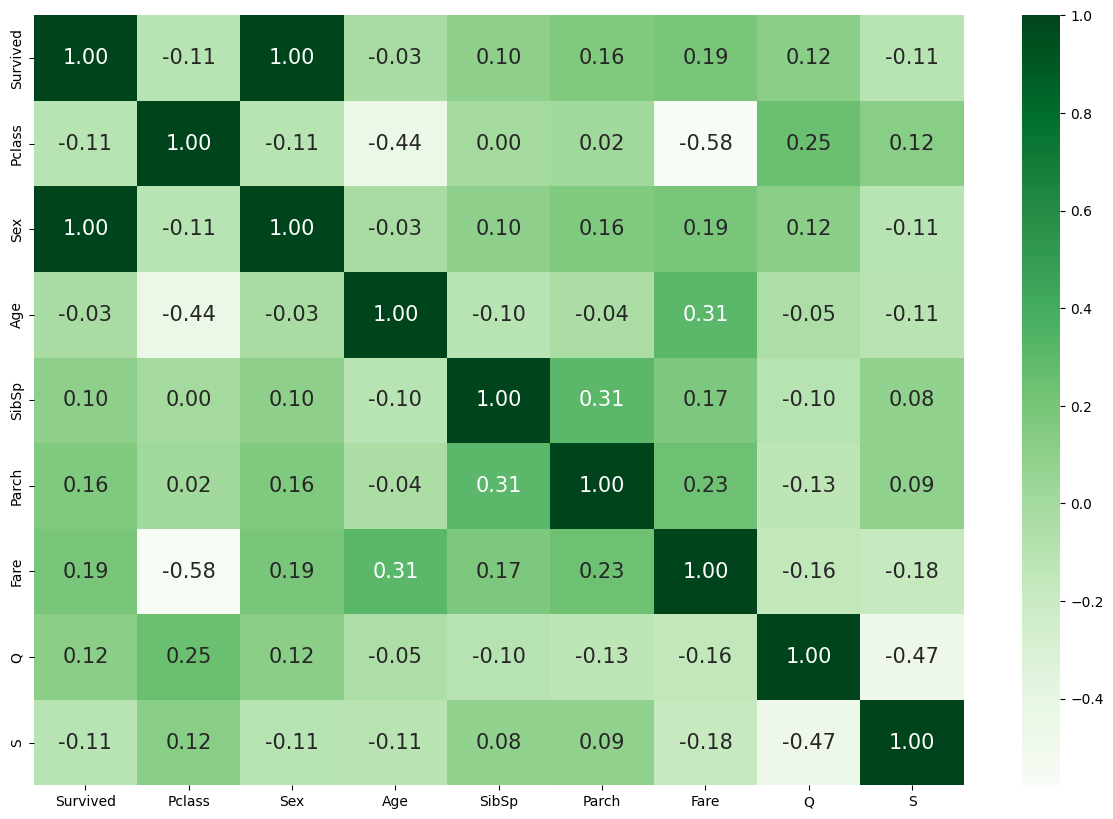

In [14]:
corr = prepared_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cbar=True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Greens')

Признак половой принадлежности имеет 100% корреляцию с целевым признаком выживаемости. Удалим это поле, чтобы не привести модель к перетренированности

In [15]:
prepared_df.drop(['Sex'], axis=1, inplace=True)

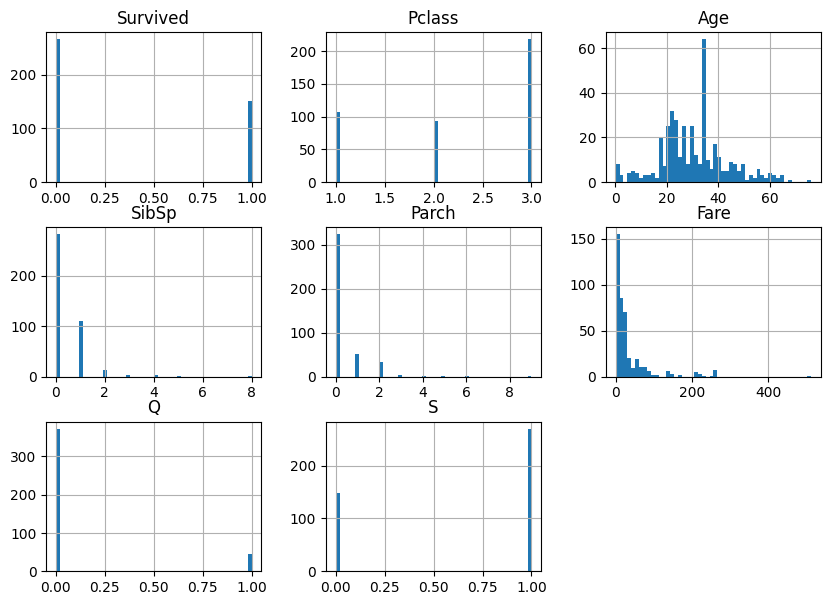

In [16]:
prepared_df.hist(bins=50, figsize=(10,7))
plt.show()

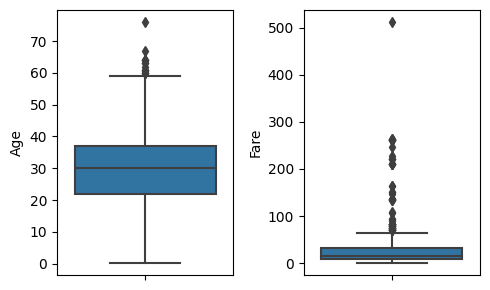

In [17]:
prepared_df_num = prepared_df[['Age', 'Fare']]

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(5,3))
i = 0
ax = ax.flatten()
for col, value in prepared_df_num.items(): 
  sns.boxplot(data=prepared_df_num, y = col, ax= ax[i])
  i+=1
plt.tight_layout()

## Очистка от выбросов

In [18]:
Q1 = prepared_df['Fare'].quantile(0.25)
Q3 = prepared_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
prepared_df['Fare']=np.where(prepared_df['Fare']>upper_whisker,upper_whisker,np.where(prepared_df['Fare']<lower_whisker,lower_whisker,prepared_df['Fare']))

## Разделение данных на выборки

Целевым признаком в обучении моделей будет являться признак выживаемости. Разделим данные на обучающую и тестовую выборки

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

mns = MinMaxScaler()

X = prepared_df.drop(['Survived'], axis=1)
y = prepared_df['Survived']
X = pd.DataFrame(mns.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

# Обучение моделей

## Выбранные модели

Используем следующие модели
* KNN
* SVC
* Дерево решений
* Случайный лес
* Градиентный бустинг

## Метрики для построения оценок качества обученных моделей

Выбираем метрики которые учитывают TP:
* $Precision = \frac{TP}{TP + FP}$ - показывает, какую долю объектов, которые модель предсказала как положительные, действительно являются положительными.
* $Recall  \frac{TP}{TP + FN}$ - показывает, какую долю положительных объектов модель способна обнаружить.
* $F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$ - среднее гармоническое precision и recall
* $ROC AUC$

## Построение базового решения

In [20]:
from sklearn.metrics import precision_score, roc_auc_score, recall_score, f1_score, roc_curve, auc

def evaluate_models(X_train, X_test, y_train, y_test, models):
    
    metrics = ['Precision', 'Recall', 'F1-score']

    for model in models:
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f'{model.__class__.__name__}:')
        for i, metric in enumerate(metrics):
            print(f'{metric}: {round([precision, recall, f1][i], 2)}')
    

        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_proba = model.decision_function(X_test)
  
        print("ROC AUC score:", roc_auc_score(y_test, y_proba))
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model.__class__.__name__}: ROC curve')
        plt.legend(loc="lower right")
        plt.show()

KNeighborsClassifier:
Precision: 0.54
Recall: 0.49
F1-score: 0.51
ROC AUC score: 0.7071736011477762


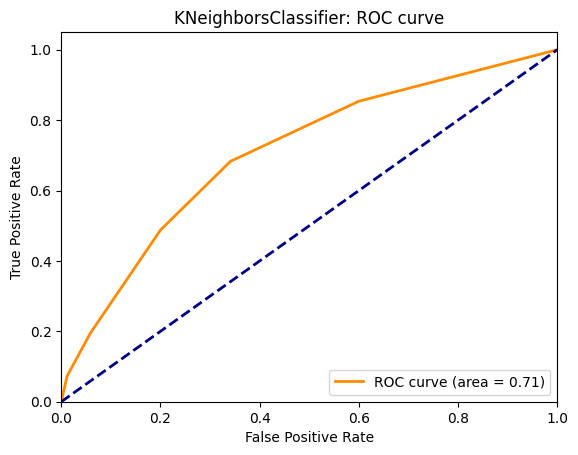

SVC:
Precision: 0.44
Recall: 0.27
F1-score: 0.33
ROC AUC score: 0.6230989956958394


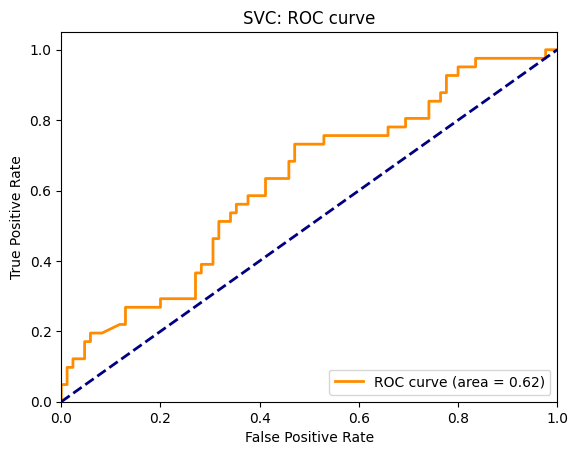

DecisionTreeClassifier:
Precision: 0.38
Recall: 0.39
F1-score: 0.39
ROC AUC score: 0.5724533715925394


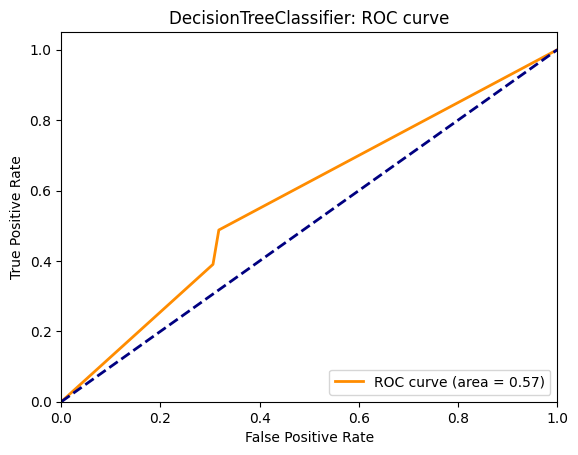

RandomForestClassifier:
Precision: 0.58
Recall: 0.51
F1-score: 0.55
ROC AUC score: 0.7424677187948352


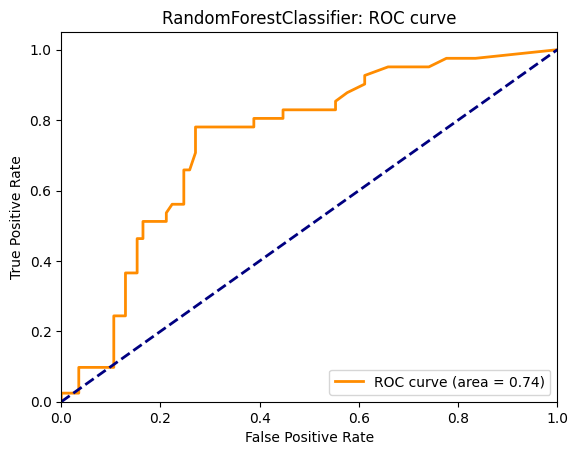

GradientBoostingClassifier:
Precision: 0.58
Recall: 0.44
F1-score: 0.5
ROC AUC score: 0.7814921090387374


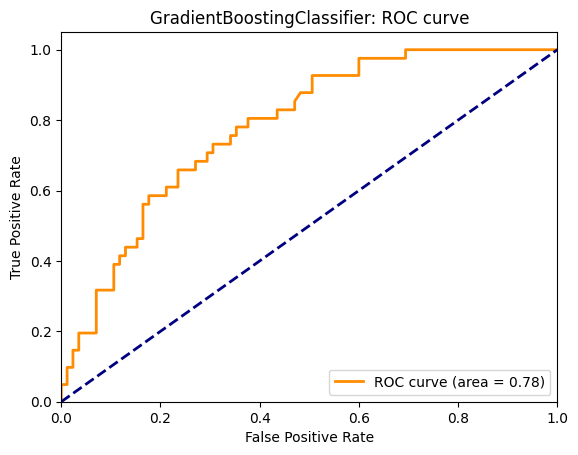

In [21]:

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = [KNeighborsClassifier(), SVC(probability=True), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier()]
evaluate_models(X_train, X_test, y_train, y_test, models)

In [22]:
from sklearn.model_selection import GridSearchCV


knn_model = KNeighborsClassifier()
param_grid = {'n_neighbors': [9, 10, 11, 12],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='precision')
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

best_knn_model = KNeighborsClassifier(**grid_search.best_params_)

Best hyperparameters: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}
Best score: 0.566923076923077


In [23]:
svc_model = SVC()
param_grid = {'C': [1, 10],
              'kernel': ['linear', 'rbf', 'poly'],
              'degree': [4, 5],
              'gamma': ['scale', 'auto']}

grid_search = GridSearchCV(svc_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

best_svc_model = SVC(**grid_search.best_params_, probability=True)

Best hyperparameters: {'C': 10, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}
Best score: 0.6644067796610169


In [24]:
tree_model = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 7, 9, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

best_tree_model = DecisionTreeClassifier(**grid_search.best_params_)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best score: 0.6984804208065459


In [25]:
rf_model = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200],
              'max_depth': [3, 5, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

best_rf_model = RandomForestClassifier(**grid_search.best_params_)

Best hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.6713033313851549


In [26]:
gb_model = GradientBoostingClassifier()
param_grid = {'learning_rate': [0.05, 0.1, 0.2],
              'max_depth': [3, 5, 7],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

best_gb_model = GradientBoostingClassifier(**grid_search.best_params_)

Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score: 0.6746347165400352


KNeighborsClassifier:
Precision: 0.59
Recall: 0.39
F1-score: 0.47
ROC AUC score: 0.7014347202295552


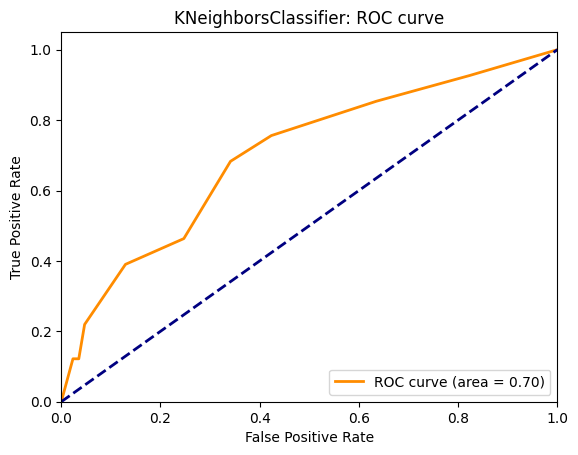

SVC:
Precision: 0.62
Recall: 0.39
F1-score: 0.48
ROC AUC score: 0.6559540889526543


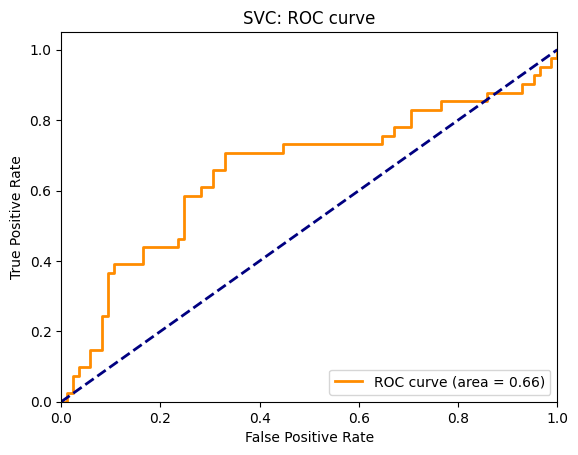

DecisionTreeClassifier:
Precision: 0.47
Recall: 0.37
F1-score: 0.41
ROC AUC score: 0.641319942611191


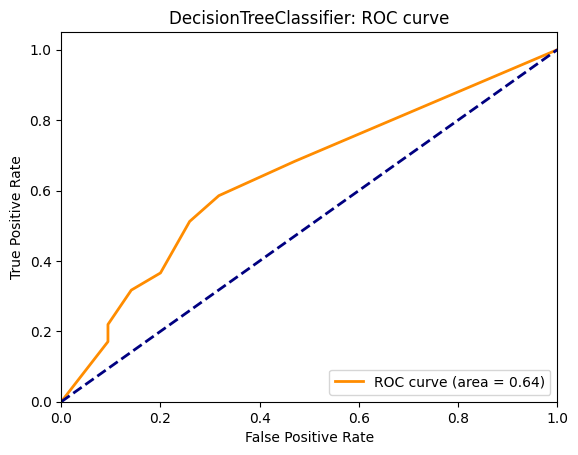

RandomForestClassifier:
Precision: 0.53
Recall: 0.46
F1-score: 0.49
ROC AUC score: 0.7246771879483501


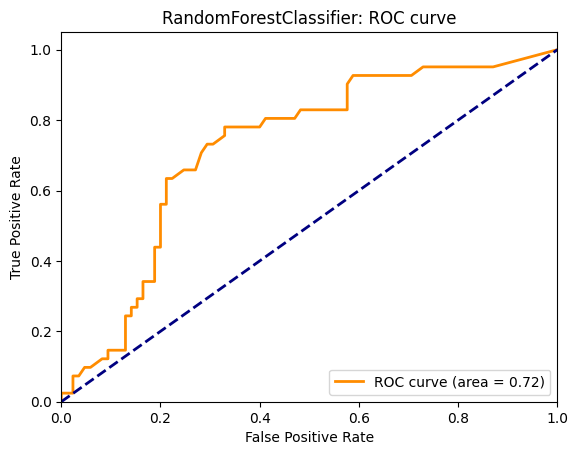

GradientBoostingClassifier:
Precision: 0.55
Recall: 0.59
F1-score: 0.56
ROC AUC score: 0.7494978479196557


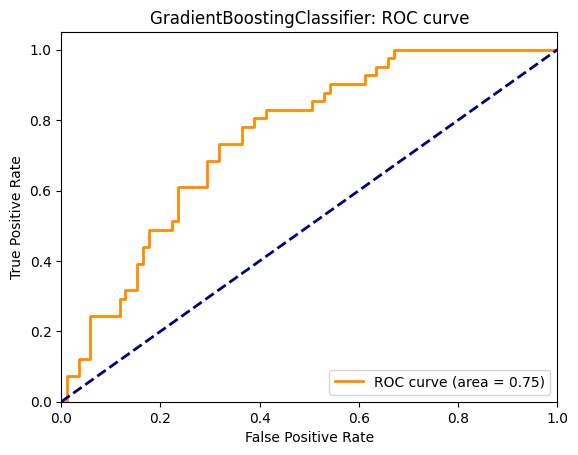

In [27]:
opt_models = [ best_knn_model, best_svc_model, best_tree_model, best_rf_model, best_gb_model]
evaluate_models(X_train, X_test, y_train, y_test, opt_models)

На основании трех метрик из четырех лучшими для решения данной задачи классификации оказались модели градиентного бустинга и дерева решений.